In [1]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import expectexception

In [5]:
df = pd.read_csv("../data/code_specialty_op.csv")

/Users/hungrysoul/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (29) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
df.head(100)

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology
0,0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50,73.0,0,1,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
1,1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,73.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40,73.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,87.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,87.0,2,0,0,1,1,0,0,0,1,0,0,0,0,0,2,0,0
5,5,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,87.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,6,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,4280,2449,V854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,87.0,1,0,1,0,2,1,0,0,0,0,0,0,1,0,0,0,0
7,7,BENE11004,CLM252512,2009-03-18,2009-03-18,PRV56011,200,PHY346833,NaN,PHY346833,72290,7245,71945,71695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,87.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0
8,8,BENE11004,CLM322683,2009-04-25,2009-05-15,PRV56011,60,PHY372925,NaN,PHY311407,71856,7265,V1254,7295,72751,4019,9597,8449,71596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,87.0,1,0,0,2,1,1,0,0,0,0,0,0,0,0,5,0,0
9,9,BENE11004,CLM339500,2009-05-04,2009-05-16,PRV56011,500,PHY412904,NaN,PHY396473,7237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760,87.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [7]:
df.shape

(517737, 70)

In [8]:
diag = df[["ClaimID",
           "cardiology",
           "urology",
           "endocrinology",        
           "emergency",
           "general",
           "infectious",
           "oncology",
           "hematology",
           "psychiatry",
           "neurology",
           "pulmonology",
           "gastroenterology",
           "ob-gyn",
           "dermatology",
           "orthopedics",
           "congenital",
           "neonatology"
           ]]

In [9]:
diag.head()

,ClaimID,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology
0,CLM624349,0,1,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0
1,CLM189947,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CLM438021,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CLM121801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,CLM150998,2,0,0,1,1,0,0,0,1,0,0,0,0,0,2,0,0


In [10]:
diag = diag.fillna(0).set_index('ClaimID')

In [27]:
diag.replace(2, 1,inplace=True)
diag.replace(3, 1,inplace=True)
diag.replace(4, 1,inplace=True)
diag.replace(5, 1,inplace=True)
diag.replace(6, 1,inplace=True)
diag.replace(7, 1,inplace=True)
diag.replace(8, 1,inplace=True)
diag.replace(9, 1,inplace=True)
diag.replace(10, 1,inplace=True)
diag.replace(11, 1,inplace=True)
diag.replace(12, 1,inplace=True)
diag.replace(13, 1,inplace=True)
diag.replace(14, 1,inplace=True)
diag.replace(15, 1,inplace=True)

In [18]:
diag.head()

,cardiology,urology,endocrinology,emergency,general,infectious,oncology,hematology,psychiatry,neurology,pulmonology,gastroenterology,ob-gyn,dermatology,orthopedics,congenital,neonatology
ClaimID,,,,,,,,,,,,,,,,,
CLM624349,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
CLM189947,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM438021,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM121801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
CLM150998,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0


In [20]:
diag.shape

(517737, 17)

### Most Frequent Items Visualization

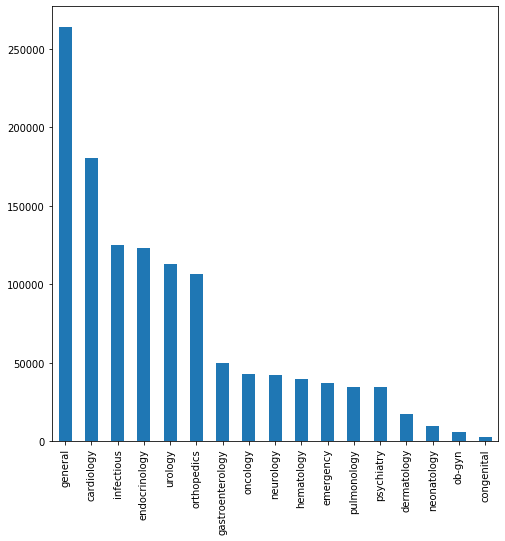

In [19]:
count = diag.sum(axis = 0).sort_values(ascending=False)
count.plot(kind="bar")

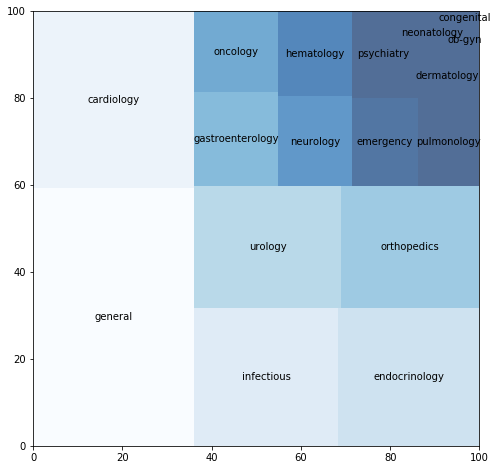

In [21]:
import squarify
plt.rcParams['figure.figsize']=(8,8)
Items = count.to_frame()
size = Items[0].values
lab = Items.index
color = plt.cm.Blues(np.linspace(0,2,22))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
#plt.title('Tree map of Most Frequent Items')
#plt.axis('off')
#plt.show()

In [28]:
frequent_itemsets = apriori(diag, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(endocrinology),(cardiology),0.238391,0.348812,0.117884,0.494499,1.417664,0.034730,1.288202
1,(cardiology),(endocrinology),0.348812,0.238391,0.117884,0.337959,1.417664,0.034730,1.150395
2,(general),(cardiology),0.509542,0.348812,0.199476,0.391480,1.122324,0.021741,1.070118
3,(cardiology),(general),0.348812,0.509542,0.199476,0.571872,1.122324,0.021741,1.145585
4,(general),(urology),0.509542,0.218659,0.163560,0.320994,1.468008,0.052144,1.150712


In [29]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(endocrinology),(cardiology),0.238391,0.348812,0.117884,0.494499,1.417664,0.034730,1.288202
1,(cardiology),(endocrinology),0.348812,0.238391,0.117884,0.337959,1.417664,0.034730,1.150395
2,(general),(cardiology),0.509542,0.348812,0.199476,0.391480,1.122324,0.021741,1.070118
3,(cardiology),(general),0.348812,0.509542,0.199476,0.571872,1.122324,0.021741,1.145585
4,(general),(urology),0.509542,0.218659,0.163560,0.320994,1.468008,0.052144,1.150712
5,(urology),(general),0.218659,0.509542,0.163560,0.748013,1.468008,0.052144,1.946357
6,(general),(endocrinology),0.509542,0.238391,0.128117,0.251436,1.054718,0.006647,1.017426
7,(endocrinology),(general),0.238391,0.509542,0.128117,0.537424,1.054718,0.006647,1.060274
8,(general),(infectious),0.509542,0.242051,0.203756,0.399880,1.652046,0.080420,1.262995
9,(infectious),(general),0.242051,0.509542,0.203756,0.841788,1.652046,0.080420,3.099997


In [36]:
rules.shape

(10, 9)

In [30]:
rules[(rules['lift'] >= 1)&(rules['confidence'] >= 0.8)].sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(infectious),(general),0.242051,0.509542,0.203756,0.841788,1.652046,0.08042,3.099997


In [31]:
lift=rules['lift'].values
support=rules['support'].values
confidence=rules['confidence'].values
conviction=rules['conviction'].values

In [32]:
lift.max()

1.6520462466350774

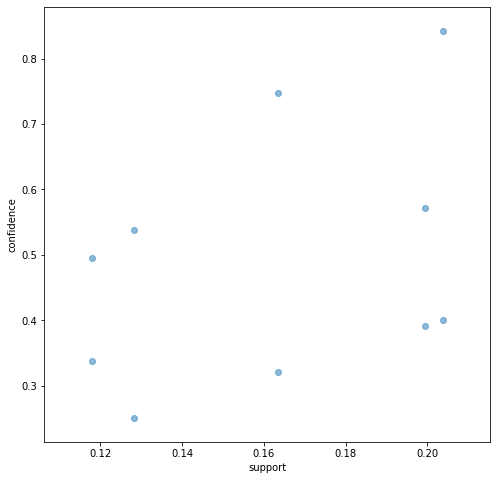

In [33]:
import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]

plt.scatter(support, confidence,   alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

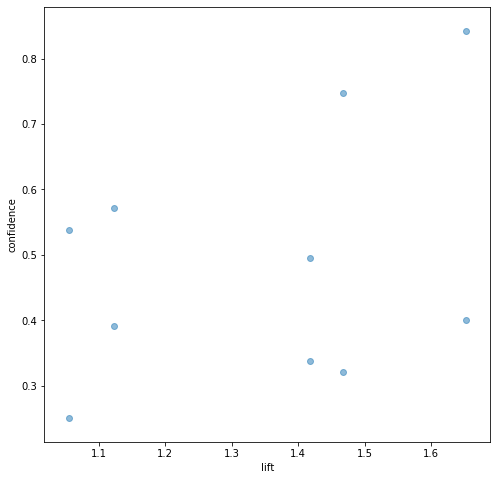

In [34]:
for i in range (len(lift)):
    lift[i] = lift[i]
    confidence[i] = confidence[i]

plt.scatter(lift, confidence, alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()

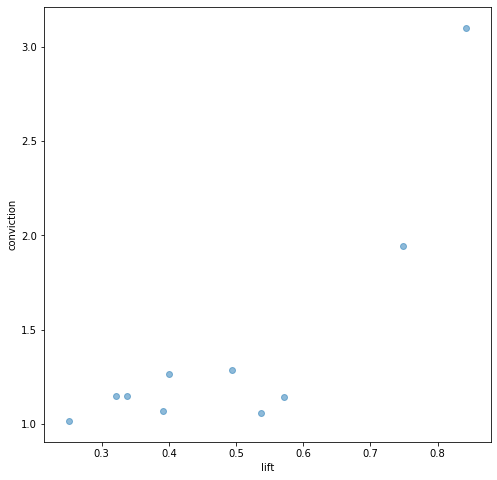

In [35]:
for i in range (len(lift)):
    confidence[i] = confidence[i]
    conviction[i] = conviction[i]

plt.scatter(confidence, conviction, alpha=0.5)
plt.xlabel('lift')
plt.ylabel('conviction') 
plt.show()